In [1]:
import pandas as pd

# File path (make sure it is correct)
file_path = r"../data/Ace_Superstore_Retail_Dataset.csv"  # Use the correct file path


try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Try ISO-8859-1 encoding
except UnicodeDecodeError:
    
    df = pd.read_csv(file_path, encoding='cp1252')  # Try cp1252 encoding

# Inspect the first few rows
print(df.head())



     Order ID  Order Date Order Mode Customer ID      City Postal Code  \
0  BTC-245712   6/22/2024     Online    LO028977    Norton          S8   
1  NZR-891212   3/15/2024   In-Store    OH046670  West End        DN36   
2  TDN-811093   2/29/2024     Online    FH015492   Newtown        RG20   
3  MIX-746378  10/25/2024   In-Store    ZZ015342  East End        BH21   
4  UGI-201465   8/18/2024     Online    TV075977    Seaton        LE15   

   Country           Region                  Product ID          Product Name  \
0  England              NaN  01JZ3N512GHNAJSF3HCCQ0PQYY  Flavored Popcorn Mix   
1  England  East of England  01JZ3N56DDVK7Y600QGH2M6T1X             Olive Oil   
2  England    East Midlands  01JZ3N53A64TW72TVK28SMMXKX   Children's Backpack   
3  England       North West  01JZ3N572S4RVA29Y33YRWH174  Honey Butter Popcorn   
4  England    East Midlands  01JZ3N52RT7CJNB27BFS6H8BF7      Sliced Cucumbers   

            Category          Sub-Category  Sales  Cost Price  Quant

In [2]:
# Check for missing values
df.isnull().sum()

# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Drop rows with missing important data (e.g., missing 'Region', 'Product ID', etc.)
df = df.dropna(subset=['Region', 'Product Name', 'Product ID'])


In [3]:
# Group data by Region and Segment
df['Revenue'] = df['Sales'] - (df['Sales'] * df['Discount'])

# Group data by Region and Category
region_segment_summary = df.groupby(['Region', 'Category']).agg(
    total_sales=('Sales', 'sum'),
    total_revenue=('Revenue', 'sum'),
    average_discount_rate=('Discount', 'mean')
).reset_index()

# Display the result directly in the console
print(region_segment_summary.head())

          Region      Category  total_sales  total_revenue  \
0  East Midlands   Accessories       705.65       539.4678   
1  East Midlands          Apps        25.99        22.8712   
2  East Midlands  Art Supplies       181.36        93.3713   
3  East Midlands         Audio       514.89       432.2690   
4  East Midlands    Automotive       194.47       171.3545   

   average_discount_rate  
0               0.192500  
1               0.120000  
2               0.282500  
3               0.160000  
4               0.137143  


In [8]:
# Group by Product Name and calculate total revenue
product_performance = df.groupby('Product Name').agg(
    total_revenue=('Revenue', 'sum')
).reset_index()

# Sort by revenue
top_5_products = product_performance.sort_values(by='total_revenue', ascending=False).head(5)
bottom_5_products = product_performance.sort_values(by='total_revenue').head(5)

top_5_products, bottom_5_products


(                 Product Name  total_revenue
 480             Electric Bike      2889.1149
 439            Digital Camera      2481.0895
 361    Compact Digital Camera      2152.2341
 19   Adjustable Standing Desk      1973.4541
 362        Compact Dishwasher      1838.5188,
                   Product Name  total_revenue
 828       LED Strip Lights Kit            0.0
 500      Electric Milk Frother            0.0
 238     Chic Ankle Strap Heels            0.0
 1690  Workstation Laptop Stand            0.0
 609           Garden Hose Reel            0.0)

In [ ]:
# Calculate margin per product (Revenue - Cost) and then calculate margins by category
df['Margin'] = df['Revenue'] - df['Cost Price']

# Group by Category to find highest margins
category_margins = df.groupby('Category').agg(
    total_margin=('Margin', 'sum')
).reset_index()

# Sort by total margin
category_margins = category_margins.sort_values(by='total_margin', ascending=False)

category_margins


,Category,total_margin
119,Kitchen,12480.5021
122,Outdoor,10803.1074
30,Electronics,7574.9968
115,Home,7201.2189
31,Fitness,4843.0069
...,...,...
55,Food - Deli Meats,8.0540
39,Food - Bread,7.3935
95,Food - Protein,4.7695
58,Food - Dressing,3.3919


In [18]:
# Group by Order Mode
order_mode_summary = df.groupby('Order Mode').agg(
    total_sales=('Sales', 'sum'),
    total_revenue=('Revenue', 'sum'),
    order_count=('Order ID', 'count')
).reset_index()

order_mode_summary


,Order Mode,total_sales,total_revenue,order_count
0,In-Store,109869.31,83811.4831,3983
1,Online,113199.71,86953.6296,4206


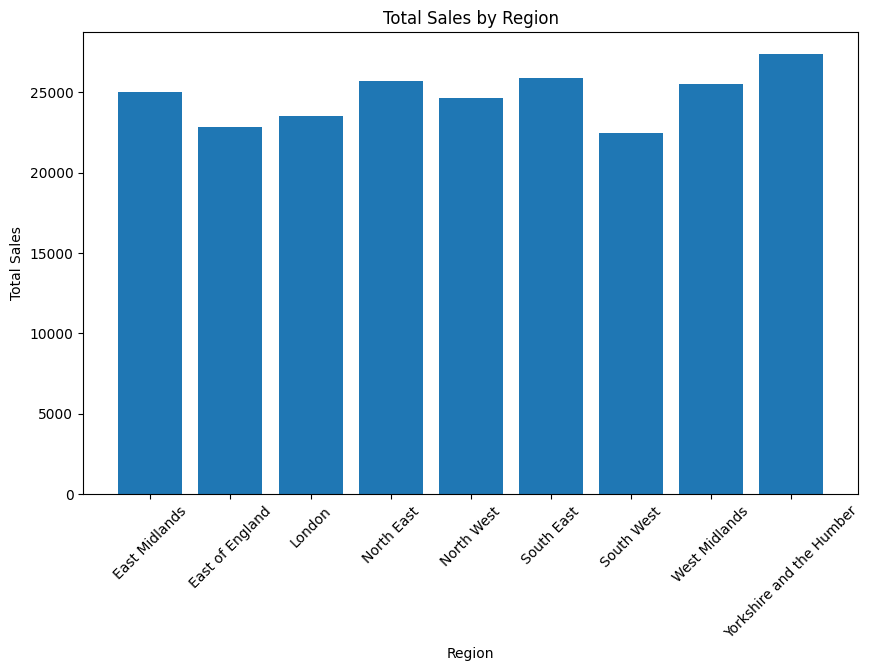

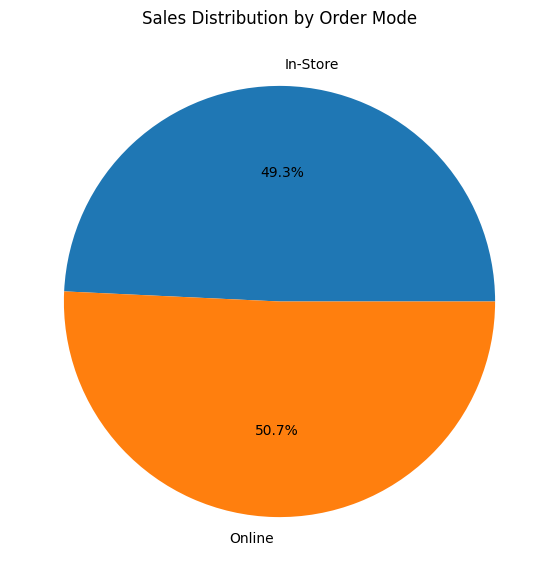

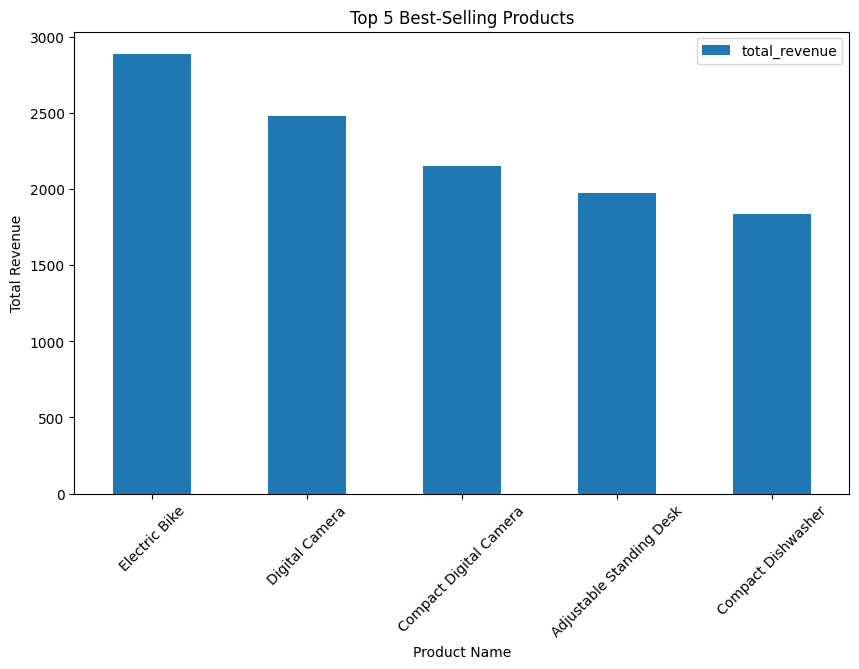

In [9]:
import matplotlib.pyplot as plt

# Sales by Region (Bar Chart)
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.bar(region_sales['Region'], region_sales['Sales'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('sales_by_region.png')
plt.show()

# Sales Distribution by Order Mode (Pie Chart)
order_mode_distribution = order_mode_summary.set_index('Order Mode')['total_sales']
order_mode_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Sales Distribution by Order Mode')
plt.ylabel('')
plt.savefig('sales_distribution_by_order_mode.png')
plt.show()

# Top 5 Products (Bar Chart)
top_5_products.plot(kind='bar', x='Product Name', y='total_revenue', figsize=(10, 6))
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.savefig('top_5_best_selling_products.png')
plt.show()
